<h2 style="text-align: center;"><b>DS&ML. Занятие 4: Matplotlib, визуализация данных</b></h2>

Для отображения в notebook

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("titanic.csv", index_col="PassengerId")
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [20]:
data = pd.DataFrame({'x': range(891), 'y': df['Age']})


Мы берем DataFrame, колонку y и делаем какой-то вызов для визуализации. Например, вызов hist, который изображает гистограмму  распределения, где высота столбика показывает количество наблюдений с таким значением, которое показано по x.

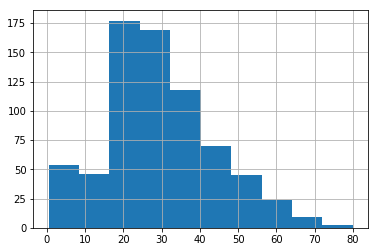

In [21]:
data.y.hist()

In [28]:
data1 = df['Age']

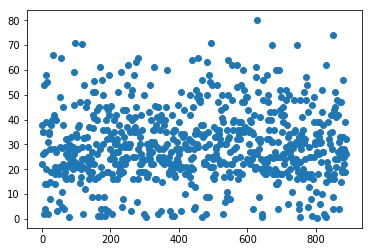

In [29]:
plt.scatter(range(len(data1)), data1)

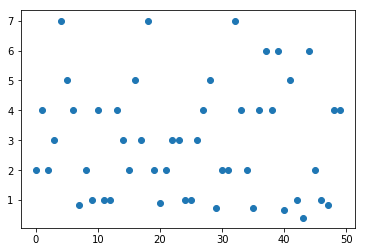

In [71]:
data2 = df[df['Age'] < 8]['Age']
plt.scatter(range(len(data2)), data2)

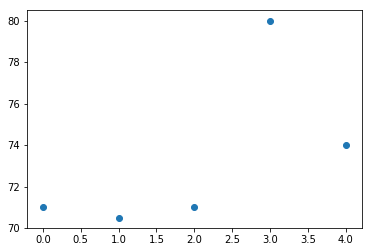

In [72]:
data3 = df[df['Age'] > 70]['Age']
plt.scatter(range(len(data3)), data3)

In [76]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Verdana'

Построим зависимость числа больных в семье Ивановых и Сидоровых от температуры на улице.

Мы имеем дискретное распределение, поэтому самое напрашиваемое представление это обычные точки

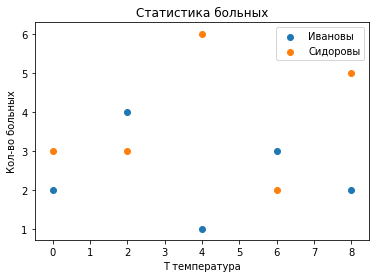

In [73]:
family_ivan = np.random.poisson(5, 5)
family_sid = np.random.poisson(5, 5)

x = np.arange(0, 10, 2)
plt.scatter(x, family_ivan, label='Ивановы')
plt.scatter(x, family_sid, label='Сидоровы')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

Чтобы отследить зависмость лучше, воспользуемся непрерывным представление

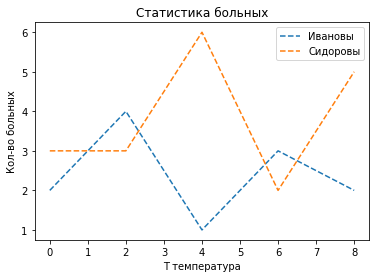

In [74]:
plt.plot(x, family_ivan, '--', label='Ивановы')
plt.plot(x, family_sid, '--', label='Сидоровы')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

Давайте попробуем другое представление полученных данных c помощью bar-chart:

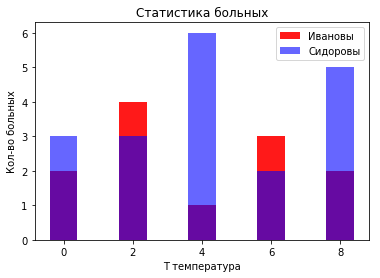

In [75]:
plt.bar(x, family_ivan, alpha=0.9
      , label='Ивановы', color='r')
plt.bar(x, family_sid, alpha=0.6, label='Сидоровы', color='b')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()


Отобразим получившиеся функции:

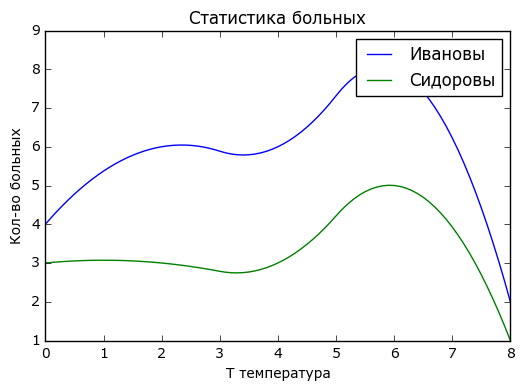

In [19]:
xnew = np.arange(0, 8.1, 0.1)
ynew_ivan = f_ivan(xnew)
ynew_sid = f_sid(xnew)
plt.plot(xnew, ynew_ivan, label='Ивановы')
plt.plot(xnew, ynew_sid, label='Сидоровы')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

Найдем самую оптимальную температуру для каждой семьи

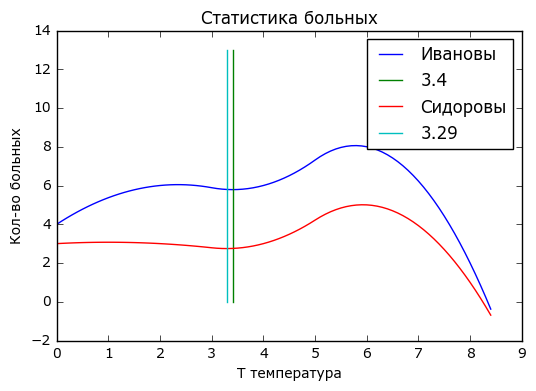

In [20]:
from scipy.optimize import minimize
max_ivan = minimize(f_ivan, x0=4)
max_sid = minimize(f_sid, x0=4)
xnew = np.arange(0, 8.5, 0.1)
ynew_ivan = f_ivan(xnew)
ynew_sid = f_sid(xnew)
plt.plot(xnew, ynew_ivan, label='Ивановы')
plt.plot([max_ivan.x[0]] * 14, np.arange(0, 14), label='{}'.format(max_ivan.x[0].round(2)))
plt.plot(xnew, ynew_sid, label='Сидоровы')
plt.plot([max_sid.x[0]] * 14, np.arange(0, 14), label='{}'.format(max_sid.x[0].round(2)))
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()